**COMPARISON OF SIGNAL PEPTIDES (SP) LENGTHS**

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [36]:
df =pd.read_csv('training_file_all_seq.tsv', sep='\t')
df['positive/negative'] =np.where(df['SP cleavage']=='False', '-','+')
df['subset_number'] = 'trainingset'

In [37]:
df2 = pd.read_csv('benchmark_arricchito.tsv', sep='\t')
df2['subset_number'] = 'benchmark'
df2['positive/negative'] =np.where(df2['SP cleavage']=='False', '-','+')

In [38]:
filter_positive_trainingset = df['positive/negative']== '+'
df_histograms_training_pos = df[filter_positive_trainingset]

In [39]:
filter_positive_benchmark = df2['positive/negative']== '+'
df_histograms_benchmark_pos = df2[filter_positive_benchmark]

In [40]:
benchmark = df_histograms_benchmark_pos[['Sequence','subset_number','SP cleavage']]
trainingset = df_histograms_training_pos[['Sequence','subset_number','SP cleavage']]

In [41]:
benchmark

,Sequence,subset_number,SP cleavage
23,MKTFVICLILVVAVSAAPDHHDGHLGGHQTGHQGGQQGGHLGGQQG...,benchmark,18
30,MLRFAVTLFAVITSSTCKKYSCLEGETHKLKPSPEPNMQECTLYSE...,benchmark,17
40,MRSLVVCLLLAACALECTARLQNVTVKGVAVCNKKRLANVEVQLYE...,benchmark,19
62,MNSPAIVIIIFSTLTFSEAWVNDWDGALNFQCQLKDSIKTISSIHS...,benchmark,19
90,MWATHGLAVALALSVLPASRALRQGDCEVCISYLGRFYQDLKDRDV...,benchmark,21
...,...,...,...
1959,MVRMVPVLLSLLLLLGPAVPQENQDGRYSLTYIYTGLSKHVEDVPA...,benchmark,20
1964,MRRCGRHSGPPSLLLLLLLLPPLLLSVPGAYAARLSVLYSSSDPLT...,benchmark,32
1973,MASLTAALATPAAAALLLLVLLAAPASAANFTCAVASGTTCKSAIL...,benchmark,28
1987,MKAVIVFCLMALSIVDAAWKPLPENLKEDLIVYQVYPRSFKDSNGD...,benchmark,17


In [42]:
benchmark["SP_sequence"] = benchmark.apply(
    lambda row: row["Sequence"][: int(row["SP cleavage"])], axis=1
)
trainingset["SP_sequence"] = trainingset.apply(
    lambda row: row["Sequence"][: int(row["SP cleavage"])], axis=1
)


/tmp/ipykernel_18158/590173960.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  benchmark["SP_sequence"] = benchmark.apply(
/tmp/ipykernel_18158/590173960.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainingset["SP_sequence"] = trainingset.apply(


In [43]:
benchmark

,Sequence,subset_number,SP cleavage,SP_sequence
23,MKTFVICLILVVAVSAAPDHHDGHLGGHQTGHQGGQQGGHLGGQQG...,benchmark,18,MKTFVICLILVVAVSAAP
30,MLRFAVTLFAVITSSTCKKYSCLEGETHKLKPSPEPNMQECTLYSE...,benchmark,17,MLRFAVTLFAVITSSTC
40,MRSLVVCLLLAACALECTARLQNVTVKGVAVCNKKRLANVEVQLYE...,benchmark,19,MRSLVVCLLLAACALECTA
62,MNSPAIVIIIFSTLTFSEAWVNDWDGALNFQCQLKDSIKTISSIHS...,benchmark,19,MNSPAIVIIIFSTLTFSEA
90,MWATHGLAVALALSVLPASRALRQGDCEVCISYLGRFYQDLKDRDV...,benchmark,21,MWATHGLAVALALSVLPASRA
...,...,...,...,...
1959,MVRMVPVLLSLLLLLGPAVPQENQDGRYSLTYIYTGLSKHVEDVPA...,benchmark,20,MVRMVPVLLSLLLLLGPAVP
1964,MRRCGRHSGPPSLLLLLLLLPPLLLSVPGAYAARLSVLYSSSDPLT...,benchmark,32,MRRCGRHSGPPSLLLLLLLLPPLLLSVPGAYA
1973,MASLTAALATPAAAALLLLVLLAAPASAANFTCAVASGTTCKSAIL...,benchmark,28,MASLTAALATPAAAALLLLVLLAAPASA
1987,MKAVIVFCLMALSIVDAAWKPLPENLKEDLIVYQVYPRSFKDSNGD...,benchmark,17,MKAVIVFCLMALSIVDA


**Comparison between the aminoacidic frequencies of the SP in our dataset and the aminoacidic frequencies of SwissProt**

In [44]:
swiss_frequencies = {
    "A": 8.25, "R": 5.53, "N": 4.06, "D": 5.45, "C": 1.37,
    "Q": 3.93, "E": 6.75, "G": 7.07, "H": 2.27, "I": 5.96,
    "L": 9.66, "K": 5.84, "M": 2.42, "F": 3.86, "P": 4.70,
    "S": 6.56, "T": 5.34, "W": 1.08, "Y": 2.92, "V": 6.87,
    'X':0, 'B':0 ,'Z':0, 'J':0
}

swiss_df = pd.DataFrame(swiss_frequencies.items(), columns=["Residue", "Frequency (%)"])
swiss_df["Database"] = "SwissProt"


In [45]:
swiss_df

,Residue,Frequency (%),Database
0,A,8.25,SwissProt
1,R,5.53,SwissProt
2,N,4.06,SwissProt
3,D,5.45,SwissProt
4,C,1.37,SwissProt
5,Q,3.93,SwissProt
6,E,6.75,SwissProt
7,G,7.07,SwissProt
8,H,2.27,SwissProt
9,I,5.96,SwissProt


**Frequences of residues in the SP of the training set:**

In [46]:
aminoacids_t = trainingset['SP_sequence'].tolist()
aminoacids_t = ''.join(aminoacids_t)
tot_aa_t = len(aminoacids_t)

training_frequencies = {'M': 0, 'K': 0, 'A': 0, 'S': 0, 'V': 0, 'T': 0, 'L': 0, 'G': 0, 'I': 0, 'P': 0, 'N': 0, 'R': 0, 'F': 0, 'E': 0, 'D': 0, 'W': 0, 'Q': 0, 'C': 0, 'H': 0, 'Y': 0, 'X':0, 'B':0 ,'Z':0, 'J':0}


for i in aminoacids_t:
    training_frequencies[i] = training_frequencies[i] + 1

for i in training_frequencies:
    training_frequencies[i] = (training_frequencies[i]/tot_aa_t)*100
    training_frequencies[i] = round(training_frequencies[i], 2)
print(training_frequencies)


{'M': 6.29, 'K': 2.27, 'A': 14.07, 'S': 7.6, 'V': 8.35, 'T': 4.45, 'L': 22.01, 'G': 5.86, 'I': 4.62, 'P': 4.12, 'N': 0.97, 'R': 3.32, 'F': 4.94, 'E': 1.33, 'D': 0.91, 'W': 1.74, 'Q': 2.03, 'C': 2.94, 'H': 1.12, 'Y': 1.05, 'X': 0.0, 'B': 0.0, 'Z': 0.0, 'J': 0.0}


**Frequences of residues in the SP of the benchmark set:**

In [47]:
aminoacids_b = benchmark['SP_sequence'].tolist()
aminoacids_b = ''.join(aminoacids_b)
tot_aa_b = len(aminoacids_b)

benchmark_frequencies = {'M': 0, 'K': 0, 'A': 0, 'S': 0, 'V': 0, 'T': 0, 'L': 0, 'G': 0, 'I': 0, 'P': 0, 'N': 0, 'R': 0, 'F': 0, 'E': 0, 'D': 0, 'W': 0, 'Q': 0, 'C': 0, 'H': 0, 'Y': 0, 'X':0, 'B':0 ,'Z':0, 'J':0}



for i in aminoacids_b:
    benchmark_frequencies[i] = benchmark_frequencies[i] + 1

for i in benchmark_frequencies:
    benchmark_frequencies[i] = (benchmark_frequencies[i]/tot_aa_b)*100
    benchmark_frequencies[i] = round(benchmark_frequencies[i], 2)
print(benchmark_frequencies)


{'M': 6.53, 'K': 1.99, 'A': 15.21, 'S': 7.19, 'V': 8.08, 'T': 4.51, 'L': 21.74, 'G': 6.55, 'I': 4.11, 'P': 3.99, 'N': 1.11, 'R': 2.88, 'F': 5.26, 'E': 1.33, 'D': 0.64, 'W': 1.95, 'Q': 2.1, 'C': 2.68, 'H': 1.07, 'Y': 0.87, 'X': 0.2, 'B': 0.0, 'Z': 0.0, 'J': 0.0}


In [48]:
benchmark_plot = pd.DataFrame(benchmark_frequencies.items(), columns=["Residue", "Frequency (%)"])
benchmark_plot['Database'] = 'benchmark'
training_plot = pd.DataFrame(training_frequencies.items(), columns=["Residue", "Frequency (%)"])
training_plot['Database'] = 'trainingset'

In [49]:
benchmark_plot

,Residue,Frequency (%),Database
0,M,6.53,benchmark
1,K,1.99,benchmark
2,A,15.21,benchmark
3,S,7.19,benchmark
4,V,8.08,benchmark
5,T,4.51,benchmark
6,L,21.74,benchmark
7,G,6.55,benchmark
8,I,4.11,benchmark
9,P,3.99,benchmark


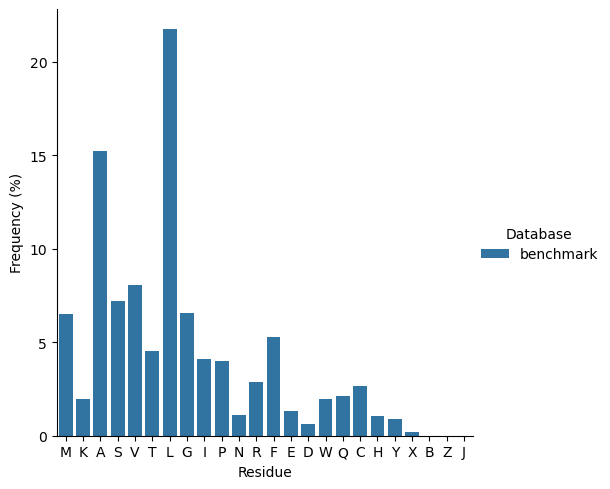

In [56]:
sns.catplot(
    data=benchmark_plot,
    x="Residue",
    y="Frequency (%)",
    hue="Database",  
    kind="bar"      
)
plt.savefig("residue_frequency_benchmark.png", dpi=300, bbox_inches="tight")

In [50]:
training_plot

,Residue,Frequency (%),Database
0,M,6.29,trainingset
1,K,2.27,trainingset
2,A,14.07,trainingset
3,S,7.60,trainingset
4,V,8.35,trainingset
5,T,4.45,trainingset
6,L,22.01,trainingset
7,G,5.86,trainingset
8,I,4.62,trainingset
9,P,4.12,trainingset


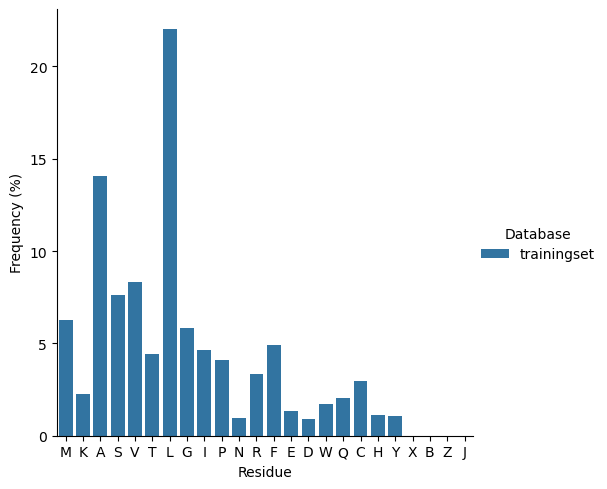

In [54]:
sns.catplot(
    data=training_plot,
    x="Residue",
    y="Frequency (%)",
    hue="Database",  
    kind="bar"      
)
plt.savefig("residue_frequency_training.png", dpi=300, bbox_inches="tight")

In [51]:
dataframe=pd.concat([benchmark_plot,training_plot,swiss_df], ignore_index=True)

In [52]:
#total dataframe comprising of SwissProt, training set and benchmark set
dataframe

,Residue,Frequency (%),Database
0,M,6.53,benchmark
1,K,1.99,benchmark
2,A,15.21,benchmark
3,S,7.19,benchmark
4,V,8.08,benchmark
...,...,...,...
67,V,6.87,SwissProt
68,X,0.00,SwissProt
69,B,0.00,SwissProt
70,Z,0.00,SwissProt


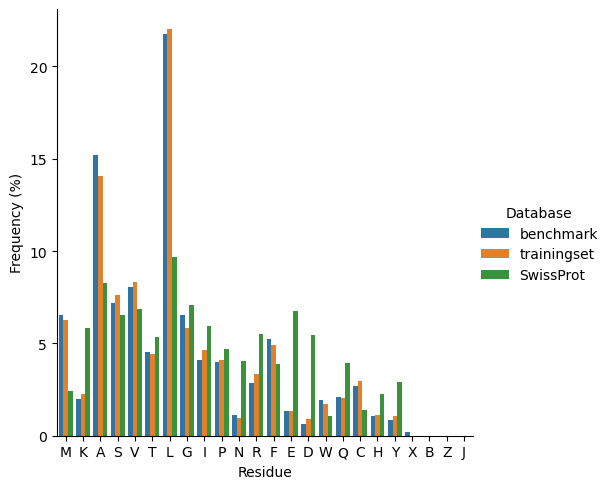

In [53]:
sns.catplot(
    data=dataframe,
    x="Residue",
    y="Frequency (%)",
    hue="Database",  
    kind="bar"      
)

plt.savefig("residue_frequency_total.png", dpi=300, bbox_inches="tight")

**Taxonomic classification of the benchmark and training sets:**

In [65]:
from collections import defaultdict

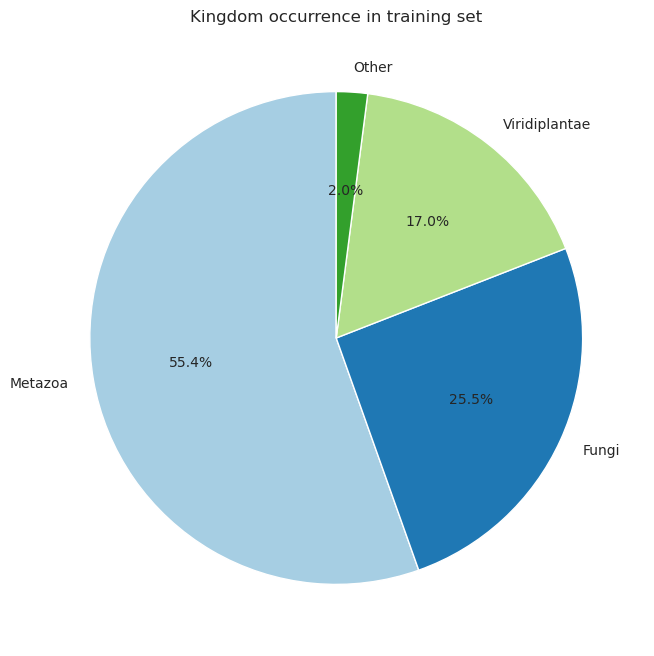

In [89]:
#
df_training =pd.read_csv('training_file_all_seq.tsv', sep='\t')

df_training_kingdom=df_training["Kingdom"].tolist()
total_entries_training=len(df_training_kingdom)
kingdoms_training=defaultdict(int) #inizializza dizionario vuoto con valori uguali a zero, che poi sarà aggiornato durante il for loop

for element in df_training_kingdom:
        kingdoms_training[element]+=1

training_pie = pd.DataFrame(kingdoms_training.items(), columns=["Kingdom", "Occurrence"])

# Grouping the lesser represented taxa as "Other"
training_pie = training_pie.sort_values(by='Occurrence', ascending=False)
threshold = 1000 # You can adjust this value

small_values = training_pie[training_pie['Occurrence'] < threshold]
main_values = training_pie[training_pie['Occurrence'] >= threshold]

# Create a new row for "Other"
other_occurrence = small_values['Occurrence'].sum()
other_row = pd.DataFrame([{'Kingdom': 'Other', 'Occurrence': other_occurrence}])

# Combine the data
cleaned_pie_data = pd.concat([main_values, other_row])

# Create the new pie chart
plt.figure(figsize=(8, 8))
plt.pie(cleaned_pie_data['Occurrence'], labels=cleaned_pie_data['Kingdom'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Add title
plt.title('Kingdom occurrence in training set')
plt.savefig("Kingdom_occurrence_in_training_set_pie.png",dpi=300, bbox_inches="tight")
plt.show()

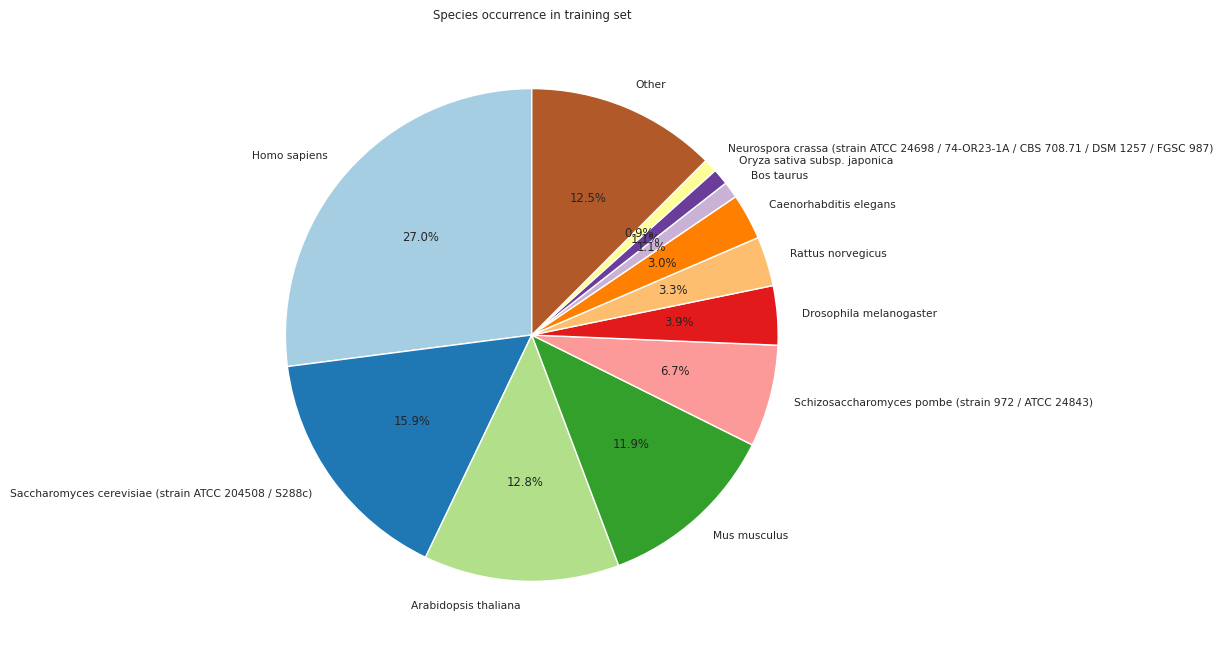

In [98]:
df_training =pd.read_csv('training_file_all_seq.tsv', sep='\t')

df_training_organism=df_training["Organism"].tolist()
total_entries_training=len(df_training_organism)
organism_training=defaultdict(int) #inizializza dizionario vuoto con valori uguali a zero, che poi sarà aggiornato durante il for loop

for element in df_training_organism:
        organism_training[element]+=1


species_training_pie = pd.DataFrame(organism_training.items(), columns=["Organism", "Occurrence"])

# Grouping the lesser represented taxa as "Other"
species_training_pie = species_training_pie.sort_values(by='Occurrence', ascending=False)
threshold = 55 # You can adjust this value

small_values = species_training_pie[species_training_pie['Occurrence'] < threshold]
main_values = species_training_pie[species_training_pie['Occurrence'] >= threshold]

# Create a new row for "Other"
other_occurrence = small_values['Occurrence'].sum()
other_row = pd.DataFrame([{'Organism': 'Other', 'Occurrence': other_occurrence}])

# Combine the data
cleaned_pie_data = pd.concat([main_values, other_row])

# Create the new pie chart
plt.figure(figsize=(8, 8))
plt.pie(cleaned_pie_data['Occurrence'], labels=cleaned_pie_data['Organism'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Add title
plt.title('Species occurrence in training set')
plt.savefig("Species_occurrence_in_training_set_pie.png",dpi=300, bbox_inches="tight")
plt.show()


defaultdict(<class 'int'>, {'Viridiplantae': 331, 'Fungi': 526, 'Metazoa': 1117, 'Amoebozoa': 11, 'Sar': 14, 'Discoba': 5, 'Rhodophyta': 1, 'Haptista': 1})


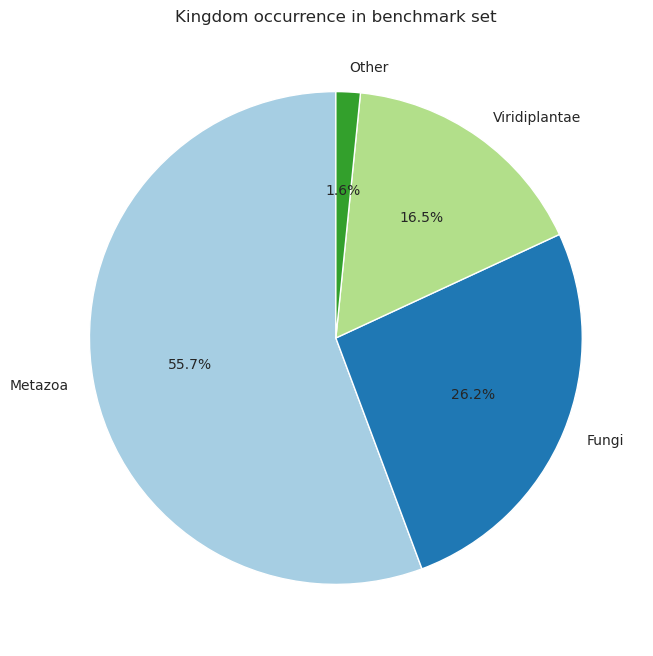

In [90]:
df_benchamrk =pd.read_csv('benchmark_arricchito.tsv', sep='\t')

df_benchmark_kingdom=df_benchamrk["Kingdom"].tolist()
total_entries_benchmark=len(df_benchmark_kingdom)
kingdoms_benchmark=defaultdict(int) #inizializza dizionario vuoto con valori uguali a zero, che poi sarà aggiornato durante il for loop

for element in df_benchmark_kingdom:
        kingdoms_benchmark[element]+=1
print(kingdoms_benchmark)
benchmark_pie = pd.DataFrame(kingdoms_benchmark.items(), columns=["Kingdom", "Occurrence"])

# Grouping the lesser represented taxa as "Other"
benchmark_pie = benchmark_pie.sort_values(by='Occurrence', ascending=False)
threshold = 300 # You can adjust this value

small_values = benchmark_pie[benchmark_pie['Occurrence'] < threshold]
main_values = benchmark_pie[benchmark_pie['Occurrence'] >= threshold]

# Create a new row for "Other"
other_occurrence = small_values['Occurrence'].sum()
other_row = pd.DataFrame([{'Kingdom': 'Other', 'Occurrence': other_occurrence}])

# Combine the data
cleaned_pie_data = pd.concat([main_values, other_row])

# Create the new pie chart
plt.figure(figsize=(8, 8))
plt.pie(cleaned_pie_data['Occurrence'], labels=cleaned_pie_data['Kingdom'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Add title
plt.title('Kingdom occurrence in benchmark set')
plt.savefig("Kingdom_occurrence_in_benchmark_set_pie.png",dpi=300, bbox_inches="tight")
plt.show()

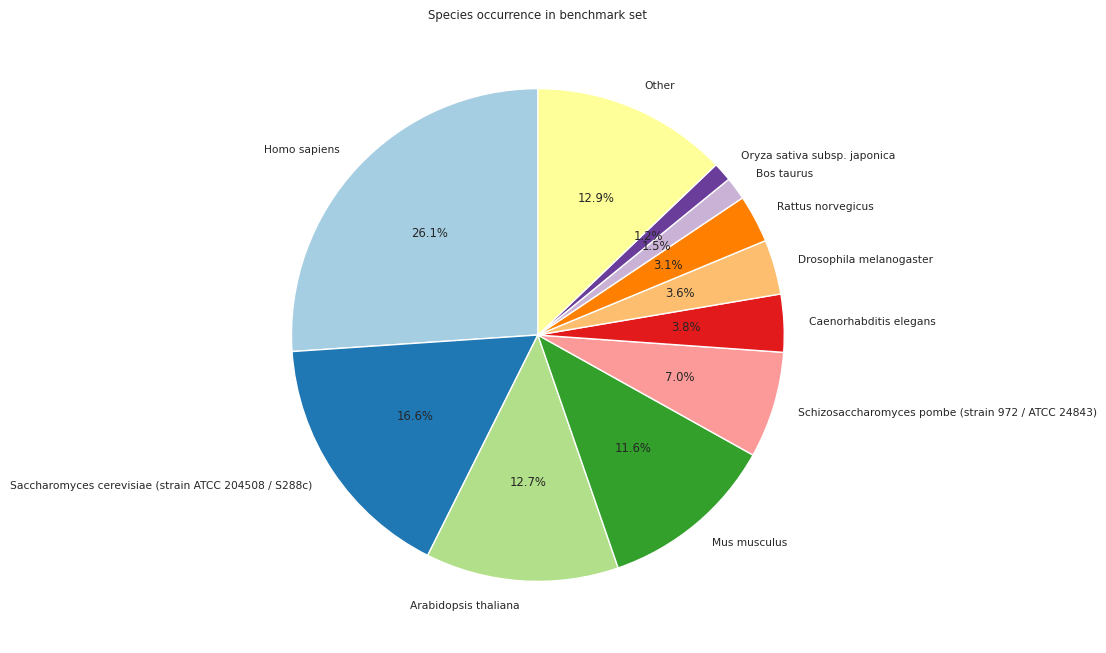

In [108]:
df_benchmark =pd.read_csv('benchmark_arricchito.tsv', sep='\t')


df_benchmark_organism=df_benchamrk["Organism"].tolist()
total_entries_benchmark=len(df_benchmark_organism)
organism_benchmark=defaultdict(int) #inizializza dizionario vuoto con valori uguali a zero, che poi sarà aggiornato durante il for loop

for element in df_benchmark_organism:
        organism_benchmark[element]+=1

species_benchmark_pie = pd.DataFrame(organism_benchmark.items(), columns=["Organism", "Occurrence"])

# Grouping the lesser represented taxa as "Other"
species_benchmark_pie = species_benchmark_pie.sort_values(by='Occurrence', ascending=False)
threshold =  20 # You can adjust this value

small_values = species_benchmark_pie[species_benchmark_pie['Occurrence'] < threshold]
main_values = species_benchmark_pie[species_benchmark_pie['Occurrence'] >= threshold]

# Create a new row for "Other"
other_occurrence = small_values['Occurrence'].sum()
other_row = pd.DataFrame([{'Organism': 'Other', 'Occurrence': other_occurrence}])

# Combine the data
cleaned_pie_data = pd.concat([main_values, other_row])

# Create the new pie chart
plt.figure(figsize=(8, 8))
plt.pie(cleaned_pie_data['Occurrence'], labels=cleaned_pie_data['Organism'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Add title
plt.title('Species occurrence in benchmark set')
plt.savefig("Species_occurrence_in_benchmark_set_pie.png",dpi=300, bbox_inches="tight")
plt.show()
